# Feature Selection Using Neural Network

This notebook demonstrates how to perform feature selection using a neural network on a software defect prediction dataset.

## Import Required Libraries

Import libraries such as pandas, NumPy, TensorFlow/Keras, and Matplotlib for data handling, neural network creation, and visualization.

In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

## Load and Explore Dataset

Load the dataset from 'preprocessed_data.csv' and display its structure, including the selected features.

In [41]:
# Load the dataset
data = pd.read_csv('preprocessed_data.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(data.head())

# Show dataset info
print("\nDataset Info:")
data.info()

# Load recommended features
with open('recommended_features.txt', 'r') as f:
    recommended_features = [line.strip() for line in f if line.strip()]

# Use recommended features for training
feature_columns = recommended_features
print("\nFeature columns:", feature_columns)

First 5 rows of the dataset:


,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
0,-1.731018,-0.696582,-0.115702,0.0,0.0,-0.115913,-0.047507,0.0,-0.468180,-0.197080,...,-0.503808,-0.458020,-0.071659,-0.606086,-0.516107,-0.663451,-0.327381,-0.610284,-0.124501,-0.558750
1,-1.728951,-0.120053,-0.677778,0.0,0.0,-0.675768,-0.637298,0.0,-0.251859,0.399277,...,-0.375444,-0.392671,0.071403,-0.586479,-0.409681,-0.268384,-0.468170,0.105057,-0.305319,-0.154703
2,-1.726884,-0.696582,-0.677778,0.0,0.0,-0.675768,-0.637298,0.0,-0.828715,-0.707150,...,-0.760538,-0.741199,1.287426,-0.694277,-0.727904,-0.719890,-0.749748,-0.712476,-0.847773,-0.847355
3,-1.724817,-0.696582,-0.677778,0.0,0.0,-0.675768,-0.637298,0.0,-0.540287,-0.765584,...,-0.632173,-0.632284,-0.322017,-0.640254,-0.647062,-0.663451,-0.608959,-0.712476,-0.305319,-0.501029
4,-1.722750,0.456477,-0.115702,0.0,0.0,-0.115913,-0.047507,0.0,0.180784,0.555465,...,-0.118714,-0.065927,-0.357782,-0.393468,-0.145924,-0.155508,-0.010605,0.002866,-0.124501,0.307065



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Index                  1676 non-null   float64
 1   LOC_BLANK              1676 non-null   float64
 2   BRANCH_COUNT           1676 non-null   float64
 3   LOC_CODE_AND_COMMENT   1676 non-null   float64
 4   LOC_COMMENTS           1676 non-null   float64
 5   CYCLOMATIC_COMPLEXITY  1676 non-null   float64
 6   DESIGN_COMPLEXITY      1676 non-null   float64
 7   ESSENTIAL_COMPLEXITY   1676 non-null   float64
 8   LOC_EXECUTABLE         1676 non-null   float64
 9   HALSTEAD_CONTENT       1676 non-null   float64
 10  HALSTEAD_DIFFICULTY    1676 non-null   float64
 11  HALSTEAD_EFFORT        1676 non-null   float64
 12  HALSTEAD_ERROR_EST     1676 non-null   float64
 13  HALSTEAD_LENGTH        1676 non-null   float64
 14  HALSTEAD_LEVEL         1676 non-null   fl

## Preprocess Data

Handle missing values, normalize the data, and split it into training and testing sets.

In [42]:
# # Handle missing values (if any)
# data = data.dropna()

# # Define the target column (choose one from your CSV, e.g., 'BRANCH_COUNT')
# target_column = 'BRANCH_COUNT'  # Change this to any other column you want to predict

# # Remove the target column from feature_columns if present
# feature_columns = [col for col in data.columns if col != target_column]

# # Separate features and target
# X = data[feature_columns].values
# y = data[target_column].values

# # Normalize features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split into train and test sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Define Neural Network for Feature Selection

Create a neural network model with input layers corresponding to the features and an output layer for the target variable.

In [43]:
# Define a simple feedforward neural network
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/musaib/Projects/Software_Defect_Prediction_aerospace/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the Neural Network

Train the neural network on the dataset and monitor its performance using metrics such as loss and accuracy.

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: -0.1497 - val_accuracy: 0.0000e+00 - val_loss: -0.9239
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: -0.1497 - val_accuracy: 0.0000e+00 - val_loss: -0.9239
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -1.9656 - val_accuracy: 0.0000e+00 - val_loss: -3.4505
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -1.9656 - val_accuracy: 0.0000e+00 - val_loss: -3.4505
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -5.5994 - val_accuracy: 0.0000e+00 - val_loss: -8.7658
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -5.5994 - val_accuracy: 0.0000e+00 - val_loss: -8.7658
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -13.1235 - val_accuracy: 0.0000e+00 - val_loss: -19.2722
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

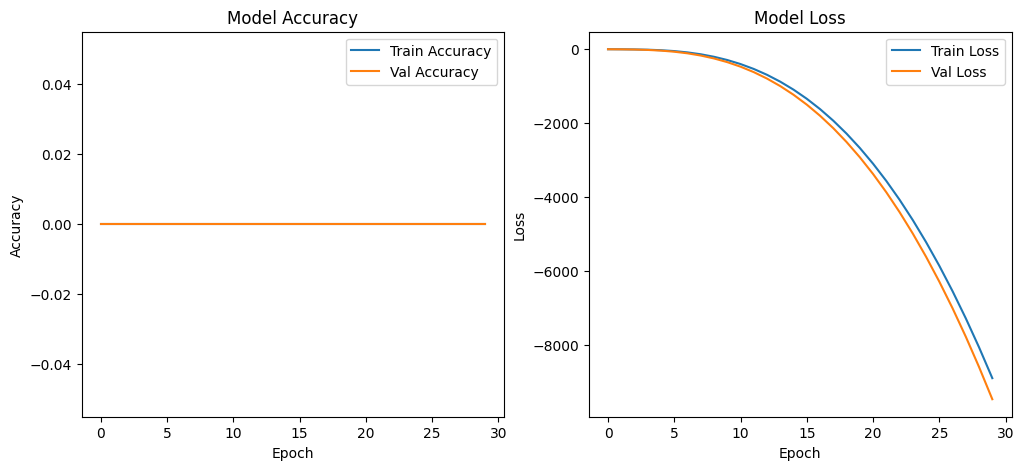

In [44]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

## Extract Important Features

Analyze the weights of the neural network to identify the most important features contributing to the predictions.

Length of feature_columns: 11
Length of feature_importance: 21
Top features by importance:


,Feature,Importance
10,10. BRANCH_COUNT,59.507614
9,9. HALSTEAD_LEVEL,57.898891
4,4. HALSTEAD_EFFORT,57.477612
7,7. HALSTEAD_VOLUME,57.410530
5,5. HALSTEAD_LENGTH,56.889256
1,1. LOC_EXECUTABLE,54.933739
8,8. NUM_OPERATORS,51.166840
0,Recommended features for software defect predi...,9.030184
3,3. NUM_OPERANDS,6.084332
2,2. HALSTEAD_PROG_TIME,5.560492


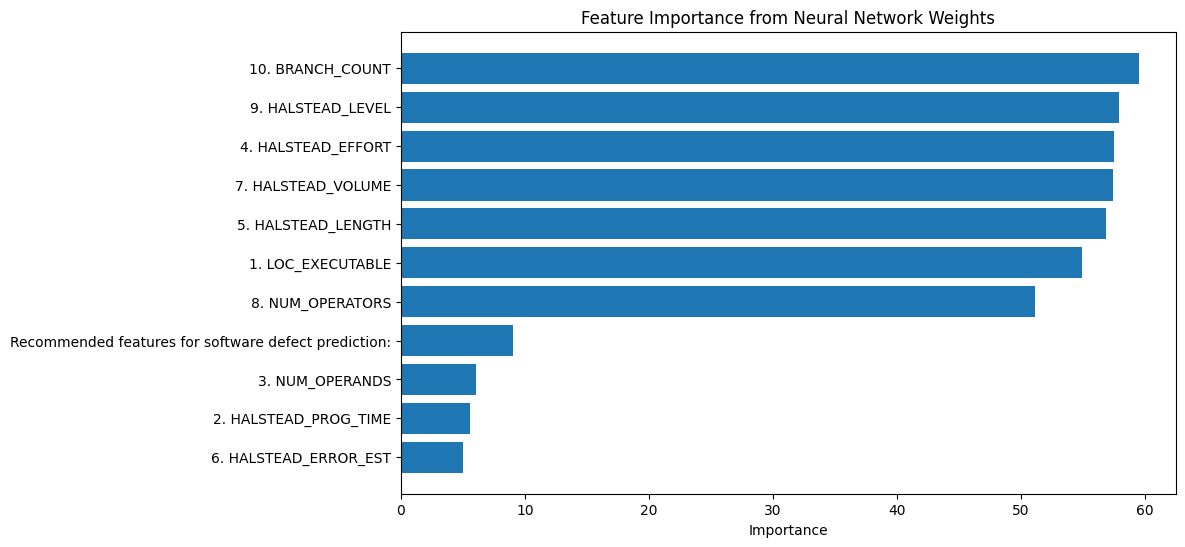

In [45]:
# Remove 'Index' from feature_columns if present
if 'Index' in feature_columns:
    print("Warning: Removing 'Index' from feature_columns to match model input shape.")
    feature_columns = [col for col in feature_columns if col != 'Index']

# Extract weights from the first layer
weights, biases = model.layers[0].get_weights()

# Calculate the absolute sum of weights for each feature
feature_importance = np.sum(np.abs(weights), axis=1)

# Debug: print lengths to check for mismatch
print(f"Length of feature_columns: {len(feature_columns)}")
print(f"Length of feature_importance: {len(feature_importance)}")
if len(feature_importance) > len(feature_columns):
    print(f"Warning: feature_importance has more elements than feature_columns. Slicing feature_importance to match feature_columns.")
    feature_importance = feature_importance[:len(feature_columns)]
if len(feature_columns) != len(feature_importance):
    raise ValueError(f"Length mismatch after slicing: feature_columns ({len(feature_columns)}) vs feature_importance ({len(feature_importance)}). Check your model input shape and feature_columns definition.")

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Top features by importance:")
display(importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Neural Network Weights')
plt.gca().invert_yaxis()
plt.show()

## Mathematical Explanation of Neural Network

Explain the mathematical equations used in the neural network, such as forward propagation, activation functions, and backpropagation.

### Forward Propagation

Given input features \( x \), the output of the first hidden layer is computed as:

\[
h_1 = \text{ReLU}(W_1 x + b_1)
\]

where \( W_1 \) and \( b_1 \) are the weights and biases of the first layer.

The output layer computes:

\[
\hat{y} = \sigma(W_2 h_1 + b_2)
\]

where \( \sigma \) is the sigmoid activation function.

### Activation Functions

- **ReLU**: \( \text{ReLU}(z) = \max(0, z) \)
- **Sigmoid**: \( \sigma(z) = \frac{1}{1 + e^{-z}} \)

### Backpropagation

The model minimizes the binary cross-entropy loss:

\[
L = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})]
\]

Gradients are computed with respect to weights and biases, and parameters are updated using the Adam optimizer.